In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

cmap = mpl.cm.jet

In [14]:
PATH = "electromigration_27/ET7_chain_"
N_RANGE = [76,70,73] #81 #76, 70, 73
files = [PATH + '{0:03}.dat'.format(i) for i in N_RANGE]
# volts = np.arange(-1, )
# norm = mpl.colors.Normalize(vmin=min(volts), vmax=max(volts))
names = ['chain middle', 'chain end', 'single molecule']
# names = ['{} V'.format(j) for j in volts]
# heights = ['{}'.format(j) for j in range(*N_RANGE)]

In [15]:
data_file = files[0]
with open(data_file,'r') as f:
    for i in range(70): # 70 for .dat, 8 for transport__.dat
        f.readline()
#         next(f) # skip first row
    df = pd.read_table(f)
#     df = pd.DataFrame(l.rstrip().split() for l in f)
#     df = df.astype('float64')
# sns.lineplot('Bias calc (V)', 'LI Y [AVG] (V)', data=df, label=height, lw=0.75)

In [16]:
df.head()

,Bias calc (V),Current [AVG] (A),LI X [AVG] (V),LI Y [AVG] (V),Current [00001] (A),LI X [00001] (V),LI Y [00001] (V),Current [00002] (A),LI X [00002] (V),LI Y [00002] (V),Current [00003] (A),LI X [00003] (V),LI Y [00003] (V)
0,1.000000,2.159970e-11,0.396180,0.030457,2.065840e-11,0.389316,0.033690,2.155110e-11,0.398809,0.032803,2.258960e-11,0.400415,0.024878
1,0.998043,2.107640e-11,0.405248,0.019921,2.014610e-11,0.410770,0.021084,2.154290e-11,0.399251,0.014057,2.154020e-11,0.405722,0.024621
2,0.996086,2.158740e-11,0.411493,0.023788,1.987610e-11,0.406152,0.025242,2.190640e-11,0.415189,0.030005,2.297980e-11,0.413138,0.016116
3,0.994129,2.117380e-11,0.397919,0.034130,2.061280e-11,0.405182,0.035487,2.148640e-11,0.391205,0.030940,2.142220e-11,0.397369,0.035963
4,0.992172,2.142280e-11,0.389472,0.022293,2.016060e-11,0.393819,0.031471,2.157430e-11,0.388130,0.019057,2.253350e-11,0.386466,0.016351


In [10]:
df['LI Y [AVG] (V)'].iloc[-1]

0.30188899999999996

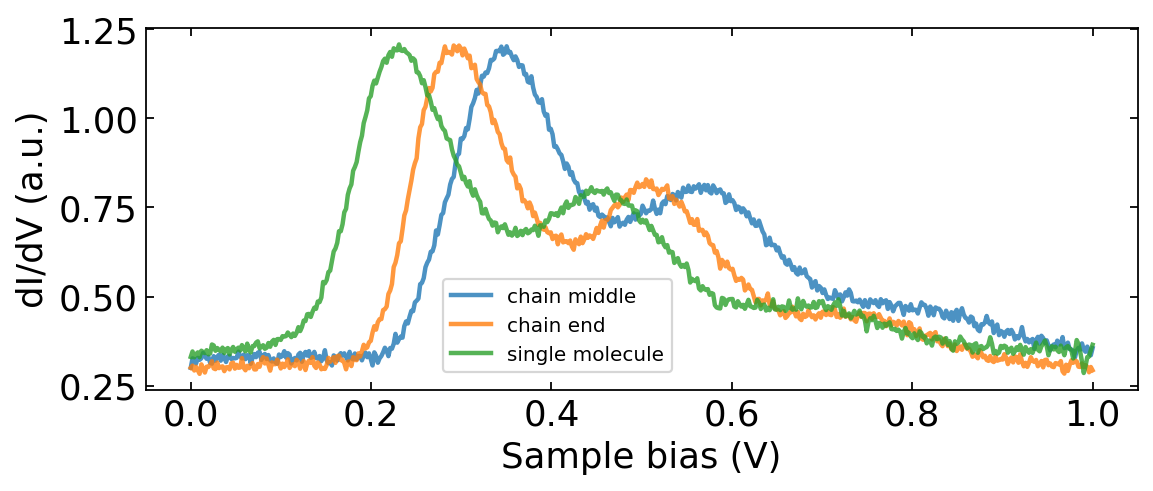

In [20]:
import math
import warnings
from scipy.ndimage import gaussian_filter
warnings.filterwarnings("ignore")
fig = plt.figure(num=None, figsize=(8, 3), dpi=160)
ax = fig.add_subplot(111)
#plt.title(PATH + str(N_RANGE[0]) + ".dat to " + str(N_RANGE[1] - 1))
mpl.rcParams.update({'font.size':16})
i = 0
j = 0
col = plt.cm.jet(np.linspace(0, 1, 101)) 
for file in files:
    with open(file,'r') as f:
        for i in range(70): # 70 for .dat, 8 for transport__.dat
            next(f) # skip first row
        df = pd.read_table(f)
        df = df.astype('float64')
#         col_j = math.floor((volts[j] - volts[0]) / (volts[-1] - volts[0]) * 100)
        if "LI Y [AVG] (V)" in df.keys():
#             ax = sns.lineplot('Bias calc (V)', 'LI Y [AVG] (V)', data=df, lw=0.75, label=names[j], color=col[col_j], ax=ax)
            norm_data = gaussian_filter((df['LI Y [AVG] (V)']-np.min(df['LI Y [AVG] (V)']))/(np.max(df['LI Y [AVG] (V)'])-np.min(df['LI Y [AVG] (V)'])), sigma=0.8) - df['LI Y [AVG] (V)'].iloc[-1] +0.26
            ax = sns.lineplot('Bias calc (V)', norm_data, data=df, lw=2, label=names[j], ax=ax, alpha=0.8)
            plt.xlabel('Sample bias (V)')
            plt.ylabel('dI/dV (a.u.)')
            #plt.xticks(np.linspace(0,1,11))
#             plt.grid('on')
            plt.box('on')
            ax.tick_params(bottom=True, top=True, left=True, right=True)
            ax.tick_params(axis="x", direction="in")
            ax.tick_params(axis="y", direction="in")
            plt.legend(loc=[0.3,0.05], fontsize=9)
        else:
#             ax = sns.lineplot('Bias calc (V)', 'LI Y (V)', data=df, lw=0.75, label=names[j], color=col[col_j], ax=ax)
            ax = sns.lineplot('Bias calc (V)', 'LI Y (V)', data=df, lw=0.75, label=names[j], ax=ax, alpha=0.5)
    

#         cbaxes = fig.add_axes([0.9, 0.1, 0.03, 0.8])
#         cb1 = mpl.colorbar.ColorbarBase(cbaxes, cmap=cmap, norm=norm, orientation='vertical')
#         cb1.set_label('Gate Voltage')
        j += 1
plt.savefig('chain_spec.svg',bbox_inches='tight')